In [5]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [6]:
# List of datasets being used.
datasets = ['magnetization_2x2.csv', 'magnetization_4x4.csv', 'Magnetization_8x8.csv', 'magnetization_16x16.csv', 'magnetization_32x32.csv']

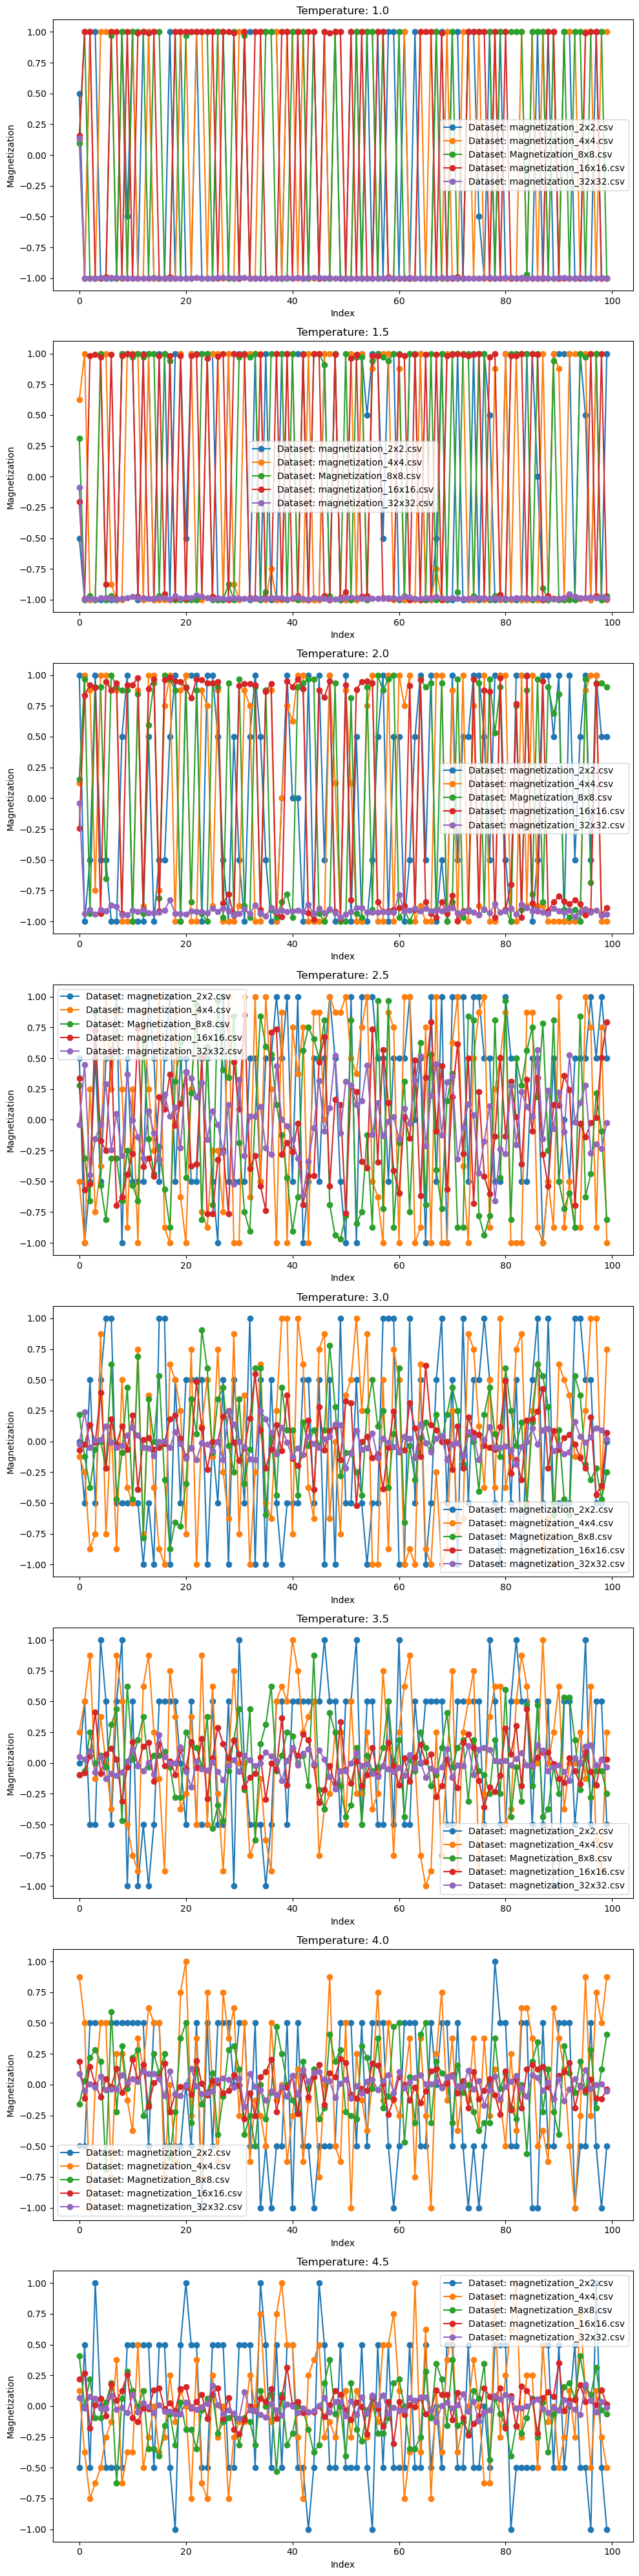

In [7]:
# Define the temperatures
temperatures = np.arange(1, 5, 0.5)

# Create a figure with a subplot for each temperature
fig, axs = plt.subplots(len(temperatures), figsize=(10, 5*len(temperatures)))

# Loop over the temperatures
for i, temp in enumerate(temperatures):
    # Loop over the datasets
    for j, dataset in enumerate(datasets):
        # Load the data into a DataFrame
        df = pd.read_csv(dataset)

        # Sort the frame to be in ascending temp order
        df = df.sort_values('Temperature', ascending=True)
        df = df.reset_index(drop=True)

        # Convert
        df['Magnetization'] = df['Magnetization'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

        # Select the row for the specific temperature
        row = df[df['Temperature'] == temp].iloc[0]

        # Plot the Magnetization values against their indices
        axs[i].plot(range(len(row['Magnetization'])), row['Magnetization'], marker='o', label=f'Dataset: {dataset}')

    axs[i].set_title(f'Temperature: {temp}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Magnetization')
    axs[i].legend()

plt.tight_layout()
plt.show()


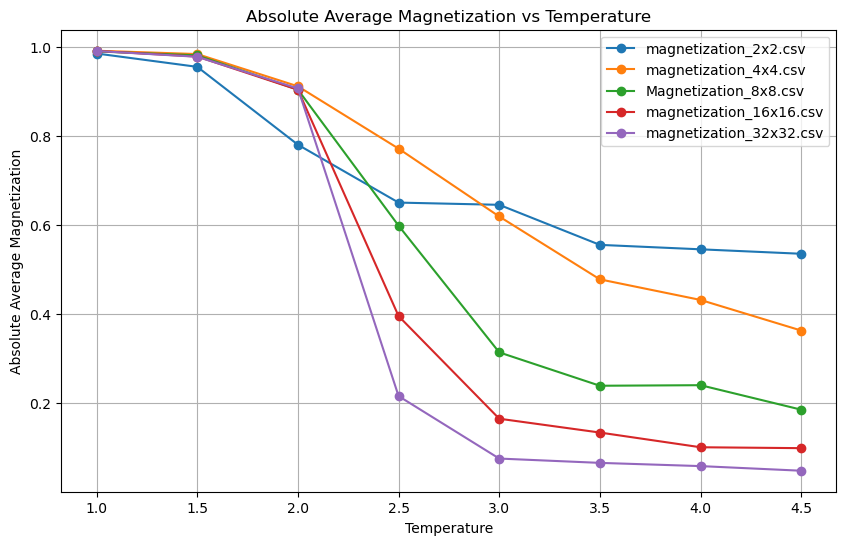

In [8]:
# Create a figure
plt.figure(figsize=(10, 6))

# Loop over the datasets
for dataset in datasets:
    # Load the data into a DataFrame
    df = pd.read_csv(dataset)
    
    # Sort the frame to be in ascending temp order
    df = df.sort_values('Temperature', ascending=True)
    df = df.reset_index(drop=True)

    #convert
    df['Magnetization'] =df['Magnetization'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

    # Calculate the absolute average magnetization for each temperature
    df['Average_Magnetization'] = df['Magnetization'].apply(lambda x: np.mean(np.abs(x)))

    # Plot the absolute average magnetization vs temperature
    plt.plot(df['Temperature'], df['Average_Magnetization'], marker='o', label=dataset)

# Add title, labels, and legend
plt.title('Absolute Average Magnetization vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Absolute Average Magnetization')
plt.legend()
plt.grid(True)
plt.show()